In [1]:
import numpy as np
from fmskill.model import ModelResult
from fmskill.observation import PointObservation, TrackObservation
from fmskill.metrics import mean_absolute_error

In [2]:
fn = '../tests/testdata/SW/HKZN_local_2017_DutchCoast.dfsu'
mr = ModelResult(fn, name='HKZN_local')
mr.dfs

Dfsu2D
Number of elements: 958
Number of nodes: 570
Projection: LONG/LAT
Number of items: 15
Time: 23 steps with dt=10800.0s
      2017-10-27 00:00:00 -- 2017-10-29 18:00:00

In [3]:
o1 = PointObservation('../tests/testdata/SW/HKNA_Hm0.dfs0', item=0, x=4.2420, y=52.6887, name="HKNA")
o2 = PointObservation("../tests/testdata/SW/eur_Hm0.dfs0", item=0, x=3.2760, y=51.9990, name="EPL")

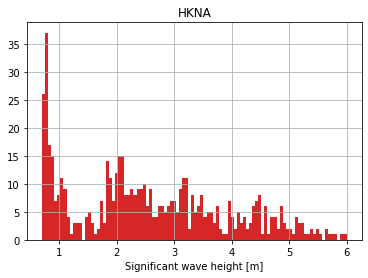

In [4]:
o1.hist();

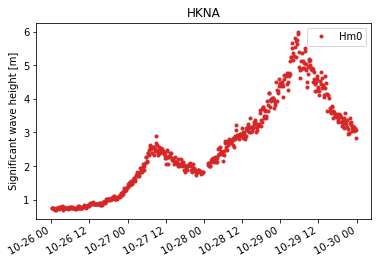

In [5]:
o1.plot(); 

In [6]:
o3 = TrackObservation("../tests/testdata/SW/Alti_c2_Dutch.dfs0", item=3, name="c2")
o3.df.head()

,Longitude,Latitude,swh
2017-10-27 12:52:52.337098,2.422854,51.253353,1.638
2017-10-27 12:52:53.280494,2.413789,51.310268,1.383
2017-10-27 12:52:54.224001,2.404711,51.367184,1.791
2017-10-27 12:52:55.167398,2.395619,51.424099,1.700
2017-10-27 12:52:56.110895,2.386516,51.481014,1.800


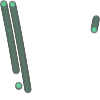

In [7]:
o3.geometry

In [8]:
mr.add_observation(o1, item=0)
mr.add_observation(o2, item=0)
mr.add_observation(o3, item=0)
mr.observations

{'HKNA': PointObservation: HKNA, x=4.242, y=52.6887,
 'EPL': PointObservation: EPL, x=3.276, y=51.999,
 'c2': TrackObservation: c2, n=298}

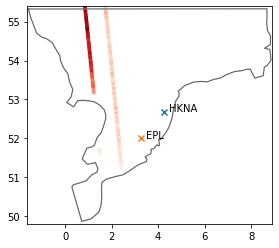

In [9]:
mr.plot_observation_positions();

In [10]:
cc = mr.extract()

In [11]:
cc

<ComparisonCollection>
PointComparer: HKNA
PointComparer: EPL
TrackComparer: c2

In [12]:
cc.skill_df()

,n,bias,rmse,mape,cc,si,r2
observation,,,,,,,
HKNA,385,-0.195266,0.352283,7.515083,0.971082,0.088488,0.988697
EPL,66,-0.075335,0.216357,8.262465,0.972467,0.073902,0.993785
c2,113,-0.001210,0.351796,11.567400,0.974335,0.118511,0.985955


In [13]:
cc["c2"].skill(metric=mean_absolute_error)

0.25199161803334846

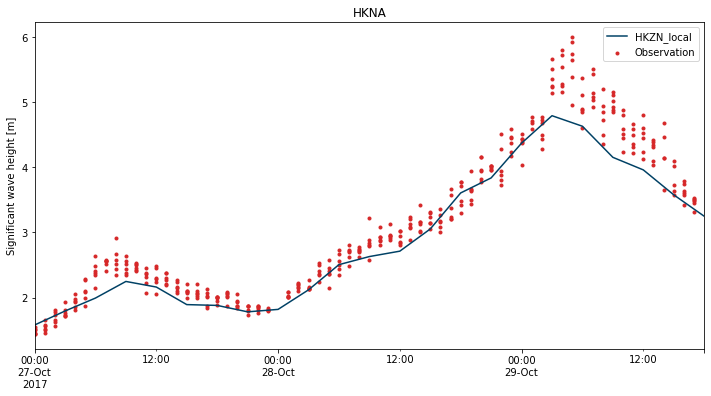

In [14]:
cc["HKNA"].plot_timeseries(figsize=(12,6));

In [15]:
cc["HKNA"].plot_timeseries(width=1000,backend="plotly")

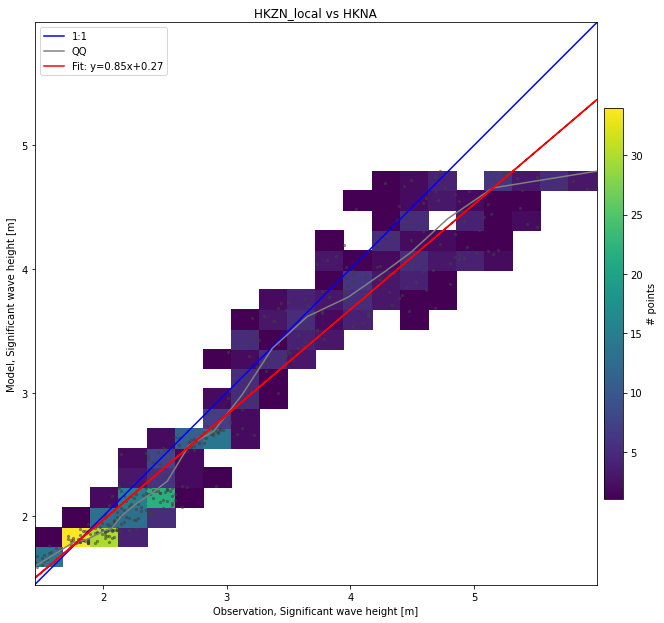

In [16]:
cc["EPL"].scatter(figsize=(12,12), show_hist=True) #, ylim=[2,8], xlim=[1,10])

In [17]:
cc["EPL"].scatter(show_hist=True, backend='plotly', width=700, height=700) #,xlim=[-1,11])

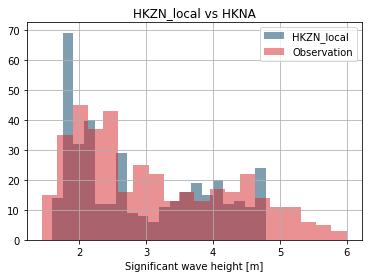

In [18]:
cc["c2"].hist(bins=20)

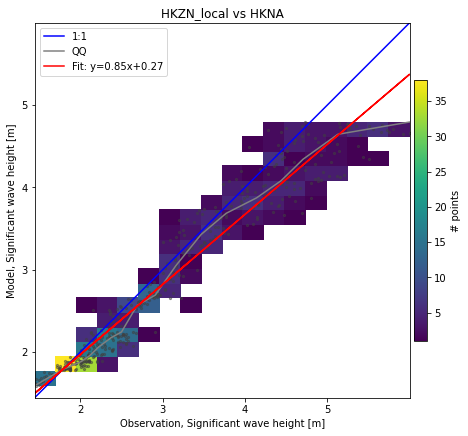

In [19]:
cc["HKNA"].scatter(binsize=0.25, cmap="viridis")

## Automatic reporting

In [20]:
from fmskill.report import Reporter
rep = Reporter(mr)

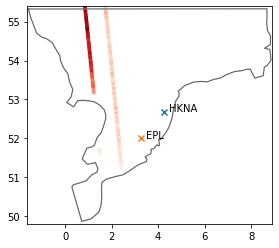

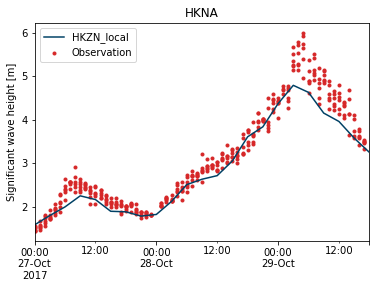

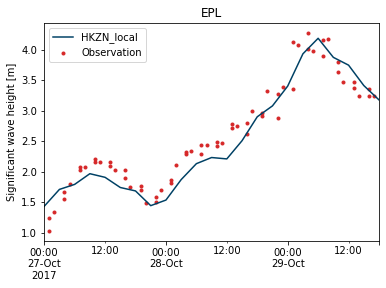

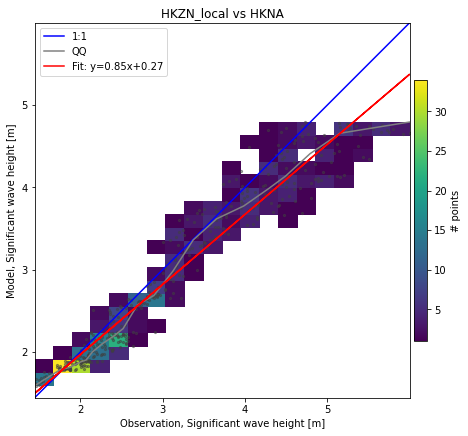

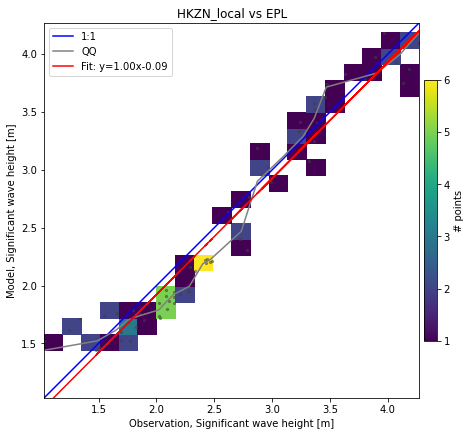

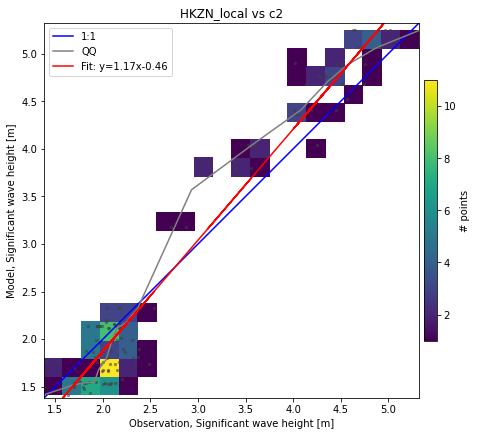

In [21]:
mdfilename = rep.markdown(); # TODO plots should not appear in the output cell